<a href="https://colab.research.google.com/github/Ayikanying-ux/Getting_started_-with_deep_learning/blob/main/Classifying_images_of_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)

2.15.0


### Import the fashion mnist dataset
- Here we are going to use the fashion mnist dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

In [8]:
fashion_mnist=tf.keras.datasets.fashion_mnist

### Load the dataset
- Here we load the dataset in (train_images, train_labels) and (test_images, test_labels)
- Loading the images return a Numpy array
- The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represent

In [9]:
(train_images, train_label), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Explort the dataset
- We can see that the shape of our train_images, it has 60000 images and each images is represented as 28 * 28 pixles

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

- The train labels also has 60000 images

In [12]:
len(train_label)

60000

In [13]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
len(test_labels)

10000

### Process the dataset
   * Before we pass our data to the model for training, we need to preprocess the data.
   * If we load the first image we see that it has not been scaled

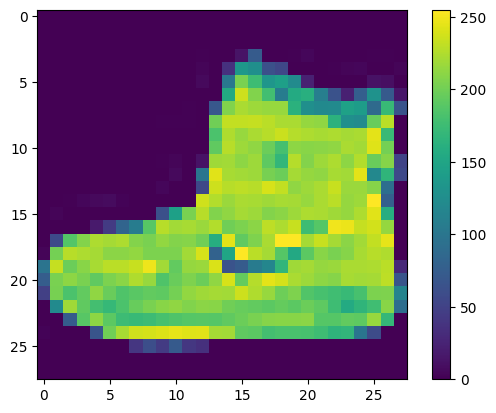

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


* Scale these values to a range of 0 to 1 before feeding them to the neural network model

In [18]:
train_images = train_images/225.0
test_images = test_images/225.0

* We verify if our image has been scaled

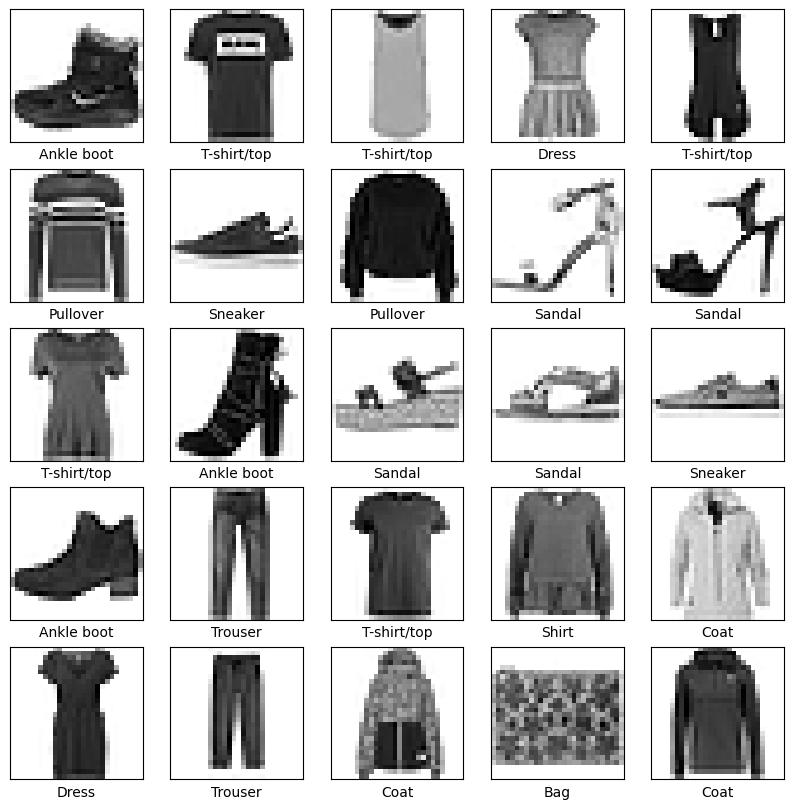

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])
plt.show()

### **Build the model**
- Build the neural network requires configurin the layers of the model, then compiling it.
### Set the layers of the model
* The basic building block of a neural network is the layer. Layers extract representations from the data fed into them

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

* The first layer **tf.keras.layers.Flatten(input_shape=(28, 28))** transforms the format of the image from a two dimensional array of (28 by 28) pixles to a one dimesion of (28*28=784)pixles.
* The second layer **tf.keras.layers.Dense(128, activation="relu")** is fully connected neural layers of 128 of neurons. The activation here introduces non-linearity to the model allowing it learn complex patterns.
* The third layer is a neural layer of 10 units which corresponds to the classes of the task.

### Compile the model
- Before the model in trained, it needs a few more settings.
  *  **Optimizer**  —This is how the model is updated based on the data it sees and its loss function.
  *  **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
  *  **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [21]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

### Train the model
Training the model requires:

    1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
    2. The model learns to associate images and labels.
    3. You ask the model to make predictions about a test set—in this example, the test_images array.
    4. Verify that the predictions match the labels from the test_labels array.

In [22]:
model.fit(train_images, train_label, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4906 - accuracy: 0.8261
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3707 - accuracy: 0.8669
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3328 - accuracy: 0.8794
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3094 - accuracy: 0.8871
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2928 - accuracy: 0.8919
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2800 - accuracy: 0.8958
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2682 - accuracy: 0.9015
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2560 - accuracy: 0.9046
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2476 - accuracy: 0.9077
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.237

### Evaluate accuracy
So after training the model, we evaluate our accuracy on the test_images

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3989 - accuracy: 0.8716 - 656ms/epoch - 2ms/step


* As we can see the model is not generalising well on unseen data, so it is overfitting which means that it learn perfectly the data and fails to generalize well on unseen data.
* For now I will go with this and later will cover overfitting and how to control it

### Make predictions.
* with the model trained, we can make predictions on some images.
* Lets attach ts.keras.SoftMax() to model to convert its linear output -logits- to probabilities

In [24]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [25]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [26]:
predictions[0]

array([1.1071683e-21, 3.3364453e-20, 3.3908472e-21, 1.1163586e-21,
       5.5564772e-22, 3.7760429e-07, 1.4530065e-18, 9.6658041e-05,
       1.6924449e-16, 9.9990290e-01], dtype=float32)



A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.

In [47]:
def plot_image(i, predictions_array, test_lable, img):
  true_label, img = test_labels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color
             )
def plot_value_array(i, predictions_array, test_labels):
  true_label = test_labels[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify Predictions
* With the model trained, you can use it to make predictions about some images.
* Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

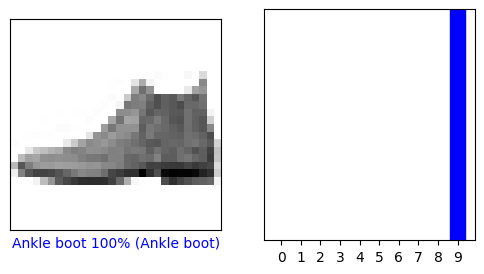

In [48]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)

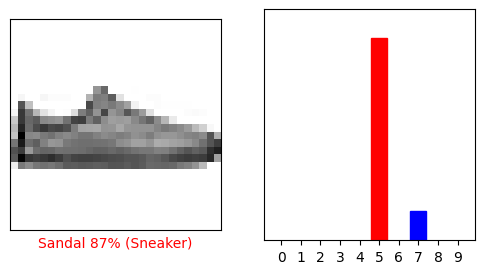

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

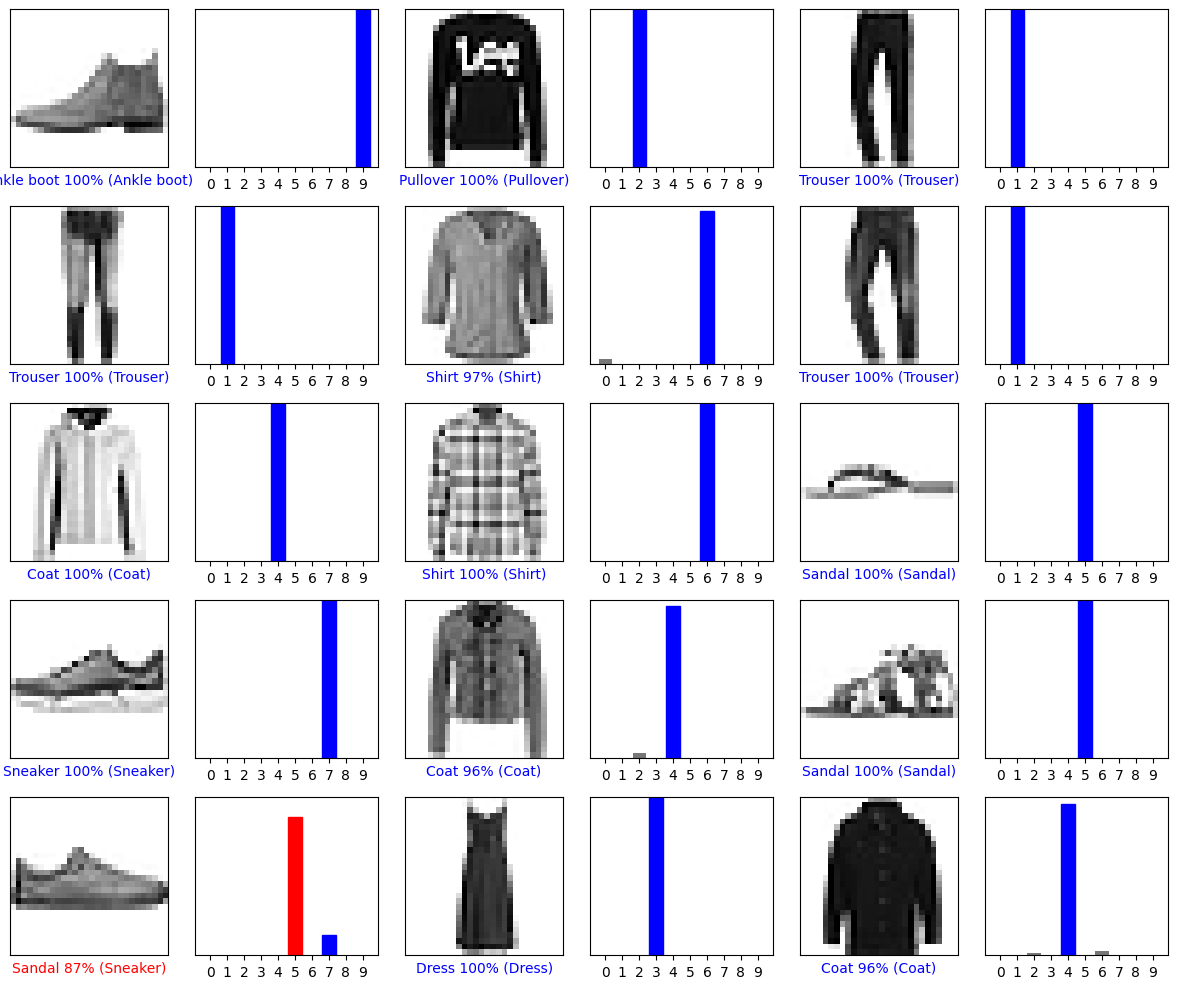

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the model
* finally we use the model to make predictions of a single image

In [51]:
img = test_images[i]
img.shape

(28, 28)

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [52]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [53]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 38ms/step
[[2.0000798e-05 6.9227735e-11 1.4759962e-02 1.2857695e-05 9.5642048e-01
  3.2196858e-13 2.8786417e-02 1.5094149e-15 3.2665648e-07 6.0700224e-14]]


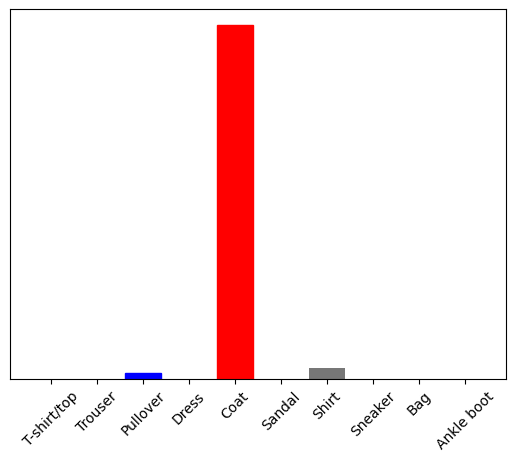

In [62]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()